# <font color=black>Manual Implementation of Image Convolution</font>

##### <font color=gray>created by Farhan Tahmid</font>

### <font color=black>Importing necessary modules and libraries</font> 

In [1]:
import numpy as np
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

### <font color=black>Defining a function to Convolve image and to Normalize overflowed pixel values</font>

In [2]:
def convolve(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    output = np.zeros_like(image, dtype=float)

    for c in range(3):
        pad_height = kernel.shape[0] // 2
        pad_width = kernel.shape[1] // 2
        padded_channel = np.pad(image[:, :, c], ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
        for x in range(image.shape[1]):
            for y in range(image.shape[0]):
                output[y, x, c] = np.sum(kernel * padded_channel[y:y+kernel.shape[0], x:x+kernel.shape[1]])

    normalize = np.clip(output, 0, 255)
    return normalize.astype(np.uint8)

### <font color=black>Loading image</font>

In [3]:
image_path=str(Path.cwd())+'/img.png'
image = Image.open(image_path)
image = np.array(image)

### <font color=black>Removing Alpha Channel from image</font>

In [4]:
if image.shape[2] == 4:
    image = image[:, :, :3]

### <font color=black>Defining a Emboss Kernel</font>

In [5]:
kernel = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])

### <font color=black>Convoluting image</font>

In [6]:
convolved_image = convolve(image, kernel)

### <font color=black>Plotting original image</font>

(-0.5, 1791.5, 1023.5, -0.5)

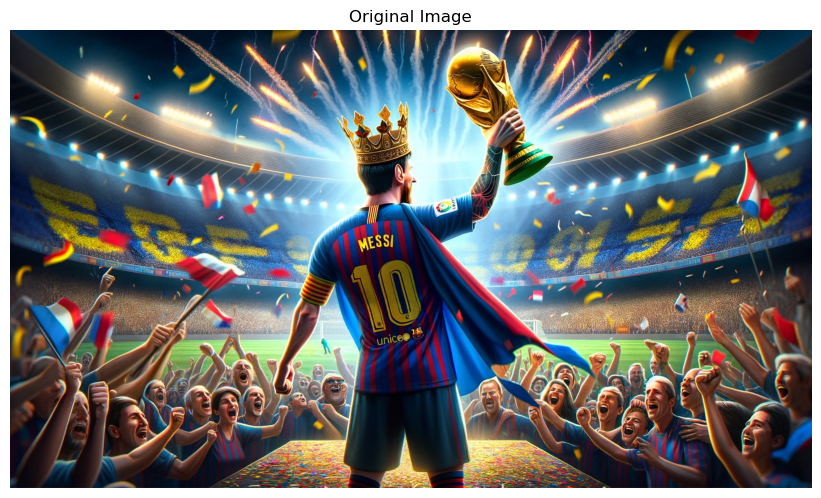

In [7]:
plt.figure(figsize=(60, 20))
plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

### <font color=black>Plotting Convoluted image of 3 seperate channels (R G B)</font>

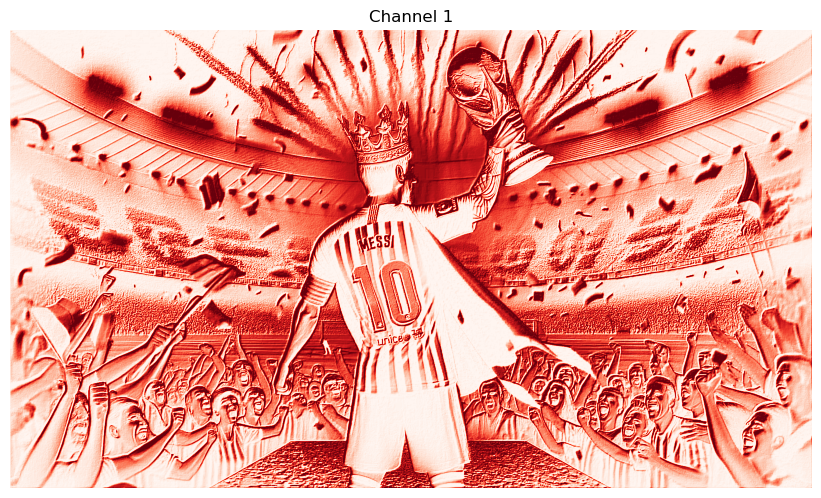

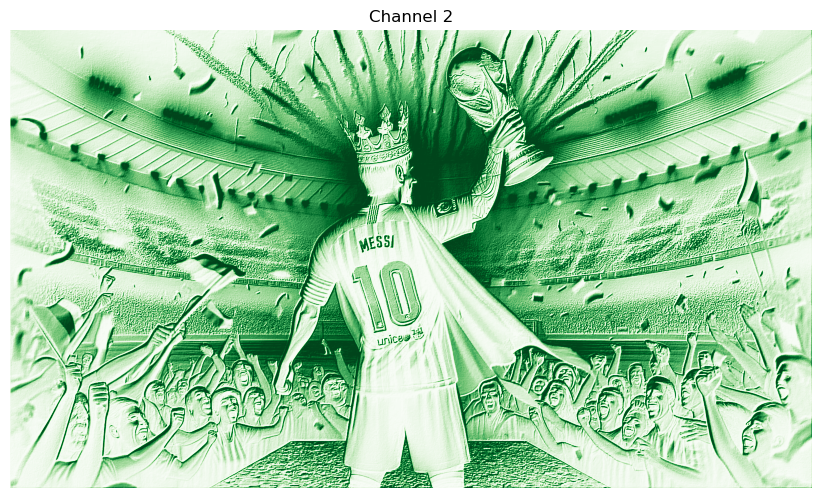

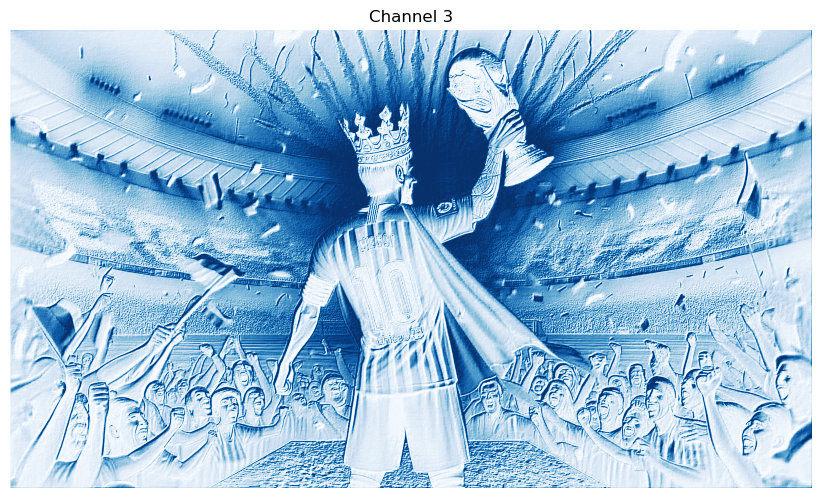

In [8]:
cmaps=['Reds','Greens','Blues']
for i in range(3):
    plt.figure(figsize=(60, 20))
    plt.subplot(1, 5, i+2)
    plt.title(f'Channel {i+1}')
    plt.imshow(convolved_image[:,:,i], cmap=cmaps[i], vmin=0, vmax=255)
    plt.axis('off')

### <font color=black>Plotting final final image containing all 3 channels</font>

(-0.5, 1791.5, 1023.5, -0.5)

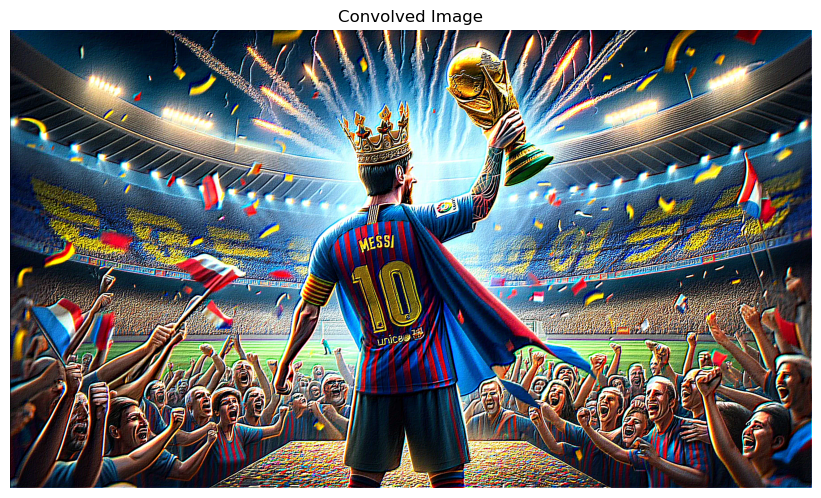

In [9]:
plt.figure(figsize=(60, 20))
plt.subplot(1, 5, 5)
plt.title('Convolved Image')
plt.imshow(convolved_image)
plt.axis('off')

### <font color=black>Showing plotted images</font>

In [10]:
plt.show()